In [29]:
import random
from numpy.random import permutation
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from sklearn import preprocessing
import math
from sklearn.metrics import confusion_matrix
import itertools

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [13]:
mypath='C:/Users/sara/Documents/5anno/TESI/DataBase_PhysioNet/www.physionet.org/physiobank/database/apnea-ecg/'

In [14]:
dfFeatures = pd.read_pickle( mypath+'Features/Features.pkl')

In [15]:
dfFeatures=dfFeatures.dropna() 

In [19]:
df_normalized=pd.DataFrame()
df_normalized['db']=dfFeatures['db']
df_normalized['mediaRR']=preprocessing.normalize([np.array(dfFeatures['mediaRR'])])[0]
df_normalized['stdRR']=preprocessing.normalize([np.array(dfFeatures['stdRR'])])[0]
df_normalized['NN50_v1']=preprocessing.normalize([np.array(dfFeatures['NN50_v1'])])[0]
df_normalized['NN50_v2']=preprocessing.normalize([np.array(dfFeatures['NN50_v2'])])[0]
df_normalized['pNN50_v1']=preprocessing.normalize([np.array(dfFeatures['pNN50_v1'])])[0]
df_normalized['pNN50_v2']=preprocessing.normalize([np.array(dfFeatures['pNN50_v2'])])[0]
df_normalized['mean_rd']=preprocessing.normalize([np.array(dfFeatures['mean_rd'])])[0]
df_normalized['std_rd']=preprocessing.normalize([np.array(dfFeatures['std_rd'])])[0]
df_normalized['RMSDD']=preprocessing.normalize([np.array(dfFeatures['RMSDD'])])[0]
df_normalized['serialCC_1']=preprocessing.normalize([np.array(dfFeatures['serialCC_1'])])[0]
df_normalized['serialCC_2']=preprocessing.normalize([np.array(dfFeatures['serialCC_2'])])[0]
df_normalized['serialCC_3']=preprocessing.normalize([np.array(dfFeatures['serialCC_3'])])[0]
df_normalized['serialCC_4']=preprocessing.normalize([np.array(dfFeatures['serialCC_4'])])[0]
df_normalized['serialCC_5']=preprocessing.normalize([np.array(dfFeatures['serialCC_5'])])[0]
df_normalized['NEP']=preprocessing.normalize([np.array(dfFeatures['NEP'])])[0]
df_normalized['label']=np.array(dfFeatures['label'])

In [20]:
# Randomly shuffle the index of nba.
random_indices = permutation(df_normalized.index)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(df_normalized)*0.3)
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = df_normalized.loc[random_indices[1:test_cutoff]]
# Generate the train set with YYYYYthe rest of the data.
train = df_normalized.loc[random_indices[test_cutoff:]]

#train,test= train_test_split(df_a, test_size=0.3, random_state=42)

In [21]:
x_columns = ['mediaRR', 'stdRR', 'NN50_v1', 'NN50_v2', 'pNN50_v1', 'pNN50_v2',
       'mean_rd', 'std_rd','RMSDD', 'serialCC_1', 'serialCC_2', 'serialCC_3',
       'serialCC_4', 'serialCC_5', 'NEP']
y_column = ['label']

In [22]:
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=1)
# Fit the model on the training data.
classifier=knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

y_pred = classifier.fit(train[x_columns], train[y_column]).predict(test[x_columns])
for i in range(0,len(y_pred)):
    y_pred[i]=math.floor(y_pred[i])

In [27]:
cnf_matrix = confusion_matrix(test[y_column]['label'], y_pred)

Confusion matrix, without normalization
[[2347  681]
 [ 646 1285]]


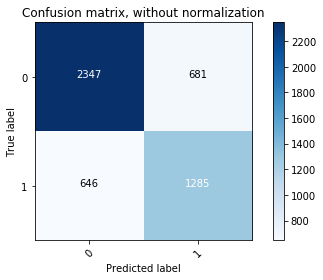

In [30]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix, without normalization')

In [31]:
accu=(cnf_matrix[0][0]+cnf_matrix[1][1])/(cnf_matrix[0][0]+cnf_matrix[1][1]+cnf_matrix[1][0]+cnf_matrix[0][1])
accu

0.7324057269610809

Normalized confusion matrix
[[0.77509908 0.22490092]
 [0.33454169 0.66545831]]


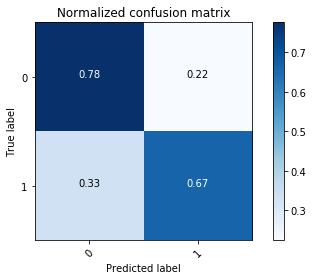

In [33]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True,
                      title='Normalized confusion matrix')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(test[y_column], y_pred))  

             precision    recall  f1-score   support

          0       0.78      0.78      0.78      3028
          1       0.65      0.67      0.66      1931

avg / total       0.73      0.73      0.73      4959

